<a href="https://colab.research.google.com/github/Armandogl14/Proyecto-grado-ICC/blob/main/proyecto_grado_npl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas scikit-learn spacy matplotlib seaborn
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 69.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# Requiere: pip install spacy scikit-learn pandas
import os
import spacy
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords

In [ ]:
# === Paso 1: Datos de entrenamiento ===
# Supongamos que tienes un archivo CSV con dos columnas: "clausula", "etiqueta"
# Etiqueta: 1 = abusiva, 0 = válida
ruta_csv = "contratos_clausulas.csv"  # <-- cambia si tienes otro nombre

In [ ]:
# Descargar las stopwords si no se han descargado antes
try:
    stopwords_es = stopwords.words('spanish')
except LookupError:
    nltk.download('stopwords')
    stopwords_es = stopwords.words('spanish')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
contratos_data = [
{"clausula": "PRIMERO: La Propietaria alquila a El Inquilino un local comercial en la Av. Abraham Lincoln No. 15, Santo Domingo. El local será usado para actividades comerciales, pero la propietaria se reserva el derecho de cambiar su uso sin previo aviso.", "etiqueta": 1},
{"clausula": "SEGUNDO: El Inquilino acepta hacerse responsable de cualquier multa impuesta por el incumplimiento de regulaciones que sean ajenas a su operación, lo que es un abuso contractual.", "etiqueta": 1},
{"clausula": "TERCERO: El contrato se prorroga automáticamente cada año con un aumento de 25% en el alquiler, sin opción de renegociación.", "etiqueta": 1},
{"clausula": "CUARTO: El inquilino debe asumir el pago de impuestos que legalmente corresponden a la propietaria.", "etiqueta": 1},
{"clausula": "QUINTO: En caso de cualquier disputa, La Propietaria tiene el derecho exclusivo de elegir el juez o tribunal que resolverá el conflicto, lo cual viola los principios de imparcialidad.", "etiqueta": 1},
{"clausula": "SEXTO: El depósito de RD$20,000.00 no podrá ser utilizado para cubrir alquileres pendientes ni será devuelto si el inquilino decide no renovar.", "etiqueta": 1},
{"clausula": "SÉPTIMO: Este contrato se firma en una sola copia, en poder exclusivo de La Propietaria, lo que impide al inquilino demostrar su existencia en caso de conflicto.", "etiqueta": 1},
{"clausula": "RIMERO: La Propietaria cede en alquiler a El Inquilino un local comercial ubicado en la Av. John F. Kennedy No. 33, Santo Domingo. Sin embargo, el contrato no especifica el metraje del local ni sus condiciones estructurales, generando ambigüedad.", "etiqueta": 1},
{"clausula": "SEGUNDO: El Inquilino deberá pagar el alquiler en dólares estadounidenses, aunque no se menciona una tasa de cambio oficial, lo que puede generar arbitrariedad en los pagos.", "etiqueta": 1},
{"clausula": "TERCERO: En caso de daños en el local, El Inquilino deberá pagar la reparación, incluso si el daño fue causado por defectos de construcción o falta de mantenimiento previo, lo cual es ilegal.", "etiqueta": 1},
{"clausula": "CUARTO: La Propietaria tendrá acceso al local en cualquier momento y sin previo aviso, lo que vulnera el derecho a la privacidad del Inquilino.", "etiqueta": 1},
{"clausula": "QUINTO: Si El Inquilino no paga el alquiler por un mes, perderá automáticamente todas las mejoras y bienes que haya instalado en el local, sin derecho a reembolso o compensación.", "etiqueta": 1},
{"clausula": "SEXTO: La duración del contrato será de 15 años sin posibilidad de terminación anticipada por parte del Inquilino, mientras que La Propietaria podrá rescindir el contrato en cualquier momento con un aviso de solo 10 días.", "etiqueta": 1},
{"clausula": "SÉPTIMO: Las partes acuerdan que cualquier conflicto será resuelto únicamente por un árbitro designado por La Propietaria, sin opción de apelación.", "etiqueta": 1},
{"clausula": "POR CUANTO: La señora Carla Estévez Herrera es propietaria del inmueble identificado como 9876543210, con una superficie de 500.00 metros cuadrados, matrícula No. 987654321, ubicado en Santiago. Según consta en el Certificado de Título registrado en el Libro 150, Folio 75, expedido el 10 de enero del 2024 por el Registro de Títulos de Santiago.", "etiqueta": 0},
{"clausula": "POR CUANTO: La señora Carla Estévez Herrera ha consentido en gravar dicho inmueble con una hipoteca en primer rango a favor de FINANCIERA DOMINICANA, S.R.L.", "etiqueta": 0},
{"clausula": "POR TANTO: La señora Carla Estévez Herrera se obliga con FINANCIERA DOMINICANA, S.R.L. al pago de la suma de RD$3,200,000.00 (Tres millones doscientos mil pesos dominicanos), con un interés del 1.7% mensual, a pagar en el plazo de tres (3) años.", "etiqueta": 0}
]


In [ ]:
df = clausulas_df = pd.DataFrame(contratos_data)
print(f"🔢 Total de cláusulas: {len(df)}")

🔢 Total de cláusulas: 17


In [ ]:
vectorizer = TfidfVectorizer(lowercase=True, stop_words=stopwords_es)
X = vectorizer.fit_transform(df["clausula"])
y = df["etiqueta"]

In [ ]:
# === Paso 3: Entrenamiento ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# === Paso 4: Evaluación ===
y_pred = clf.predict(X_test)
print("\n📊 Resultados de Clasificación:")
print(classification_report(y_test, y_pred, target_names=["Válida", "Abusiva"]))



📊 Resultados de Clasificación:
              precision    recall  f1-score   support

      Válida       0.00      0.00      0.00         1
     Abusiva       0.75      1.00      0.86         3

    accuracy                           0.75         4
   macro avg       0.38      0.50      0.43         4
weighted avg       0.56      0.75      0.64         4



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# === Paso 4: Evaluación ===
y_pred = clf.predict(X_test)
print("\n📊 Resultados de Clasificación:")
print(classification_report(y_test, y_pred, target_names=["Válida", "Abusiva"]))



📊 Resultados de Clasificación:
              precision    recall  f1-score   support

      Válida       0.00      0.00      0.00         1
     Abusiva       0.75      1.00      0.86         3

    accuracy                           0.75         4
   macro avg       0.38      0.50      0.43         4
weighted avg       0.56      0.75      0.64         4



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# === Paso 5: Análisis de contrato completo (texto largo) ===
nlp = spacy.load("es_core_news_md")

def analizar_contrato(texto):
    print("\n📑 CLÁUSULAS DEL CONTRATO:")
    clausulas = [c.strip() for c in texto.split(".") if len(c.strip()) > 10]

    for c in clausulas:
        vec = vectorizer.transform([c])
        pred = clf.predict(vec)[0]
        print(f"• {c} ➜ {'Abusiva 🚫' if pred else 'Válida ✅'}")

    print("\n🔍 ENTIDADES ENCONTRADAS:")
    doc = nlp(texto)
    for ent in doc.ents:
        print(f"• {ent.text} → {ent.label_}")

In [ ]:
# === Paso 6: Probar con contrato de ejemplo ===
ejemplo_contrato = """
Contrato firmado el 12 de mayo de 2024 entre María López y Juan Pérez. El comprador asume todas las responsabilidades legales desde la firma, incluso si el vendedor no entrega el vehículo. El precio fue de RD$900,000. El vendedor podrá seguir utilizando el vehículo durante 3 meses tras la venta.
"""

analizar_contrato(ejemplo_contrato)



📑 CLÁUSULAS DEL CONTRATO:
• Contrato firmado el 12 de mayo de 2024 entre María López y Juan Pérez ➜ Abusiva 🚫
• El comprador asume todas las responsabilidades legales desde la firma, incluso si el vendedor no entrega el vehículo ➜ Abusiva 🚫
• El precio fue de RD$900,000 ➜ Abusiva 🚫
• El vendedor podrá seguir utilizando el vehículo durante 3 meses tras la venta ➜ Abusiva 🚫

🔍 ENTIDADES ENCONTRADAS:
• María López → PER
• Juan Pérez → PER
• El comprador → MISC
• El precio → MISC
• RD$900,000 → LOC
• El vendedor → MISC


#Segunda prueb

In [ ]:
import pandas as pd
import spacy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [ ]:
import nltk
from nltk.corpus import stopwords
try:
    stopwords_es = stopwords.words('spanish')
except LookupError:
    nltk.download('stopwords')
    stopwords_es = stopwords.words('spanish')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
contratos_data = [
{"clausula": "PRIMERO: La Propietaria alquila a El Inquilino un local comercial en la Av. Abraham Lincoln No. 15, Santo Domingo. El local será usado para actividades comerciales, pero la propietaria se reserva el derecho de cambiar su uso sin previo aviso.", "etiqueta": 1},
{"clausula": "SEGUNDO: El Inquilino acepta hacerse responsable de cualquier multa impuesta por el incumplimiento de regulaciones que sean ajenas a su operación, lo que es un abuso contractual.", "etiqueta": 1},
{"clausula": "TERCERO: El contrato se prorroga automáticamente cada año con un aumento de 25% en el alquiler, sin opción de renegociación.", "etiqueta": 1},
{"clausula": "CUARTO: El inquilino debe asumir el pago de impuestos que legalmente corresponden a la propietaria.", "etiqueta": 1},
{"clausula": "QUINTO: En caso de cualquier disputa, La Propietaria tiene el derecho exclusivo de elegir el juez o tribunal que resolverá el conflicto, lo cual viola los principios de imparcialidad.", "etiqueta": 1},
{"clausula": "SEXTO: El depósito de RD$20,000.00 no podrá ser utilizado para cubrir alquileres pendientes ni será devuelto si el inquilino decide no renovar.", "etiqueta": 1},
{"clausula": "SÉPTIMO: Este contrato se firma en una sola copia, en poder exclusivo de La Propietaria, lo que impide al inquilino demostrar su existencia en caso de conflicto.", "etiqueta": 1},
{"clausula": "RIMERO: La Propietaria cede en alquiler a El Inquilino un local comercial ubicado en la Av. John F. Kennedy No. 33, Santo Domingo. Sin embargo, el contrato no especifica el metraje del local ni sus condiciones estructurales, generando ambigüedad.", "etiqueta": 1},
{"clausula": "SEGUNDO: El Inquilino deberá pagar el alquiler en dólares estadounidenses, aunque no se menciona una tasa de cambio oficial, lo que puede generar arbitrariedad en los pagos.", "etiqueta": 1},
{"clausula": "TERCERO: En caso de daños en el local, El Inquilino deberá pagar la reparación, incluso si el daño fue causado por defectos de construcción o falta de mantenimiento previo, lo cual es ilegal.", "etiqueta": 1},
{"clausula": "CUARTO: La Propietaria tendrá acceso al local en cualquier momento y sin previo aviso, lo que vulnera el derecho a la privacidad del Inquilino.", "etiqueta": 1},
{"clausula": "QUINTO: Si El Inquilino no paga el alquiler por un mes, perderá automáticamente todas las mejoras y bienes que haya instalado en el local, sin derecho a reembolso o compensación.", "etiqueta": 1},
{"clausula": "SEXTO: La duración del contrato será de 15 años sin posibilidad de terminación anticipada por parte del Inquilino, mientras que La Propietaria podrá rescindir el contrato en cualquier momento con un aviso de solo 10 días.", "etiqueta": 1},
{"clausula": "SÉPTIMO: Las partes acuerdan que cualquier conflicto será resuelto únicamente por un árbitro designado por La Propietaria, sin opción de apelación.", "etiqueta": 1},
{"clausula": "POR CUANTO: La señora Carla Estévez Herrera es propietaria del inmueble identificado como 9876543210, con una superficie de 500.00 metros cuadrados, matrícula No. 987654321, ubicado en Santiago. Según consta en el Certificado de Título registrado en el Libro 150, Folio 75, expedido el 10 de enero del 2024 por el Registro de Títulos de Santiago.", "etiqueta": 0},
{"clausula": "POR CUANTO: La señora Carla Estévez Herrera ha consentido en gravar dicho inmueble con una hipoteca en primer rango a favor de FINANCIERA DOMINICANA, S.R.L.", "etiqueta": 0},
{"clausula": "POR TANTO: La señora Carla Estévez Herrera se obliga con FINANCIERA DOMINICANA, S.R.L. al pago de la suma de RD$3,200,000.00 (Tres millones doscientos mil pesos dominicanos), con un interés del 1.7% mensual, a pagar en el plazo de tres (3) años.", "etiqueta": 0}
]


In [ ]:
df = clausulas_df = pd.DataFrame(contratos_data)
print(f"🔢 Total de cláusulas: {len(df)}")

🔢 Total de cláusulas: 17


In [ ]:
#Paso 2: Entrenar el modelo de clasificación

X_train, X_test, y_train, y_test = train_test_split(df["clausula"], df["etiqueta"], test_size=0.2, random_state=42)

pipeline = Pipeline([
('tfidf', TfidfVectorizer(stop_words=stopwords_es)),
('clf', LogisticRegression(max_iter=1000))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.75      1.00      0.86         3

    accuracy                           0.75         4
   macro avg       0.38      0.50      0.43         4
weighted avg       0.56      0.75      0.64         4



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


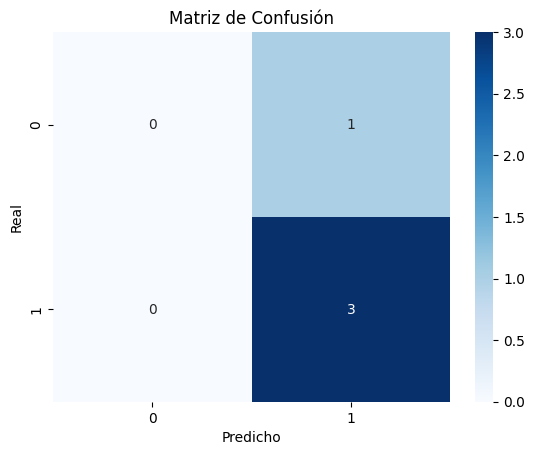

In [ ]:
#Paso 3: Visualizar matriz de confusión

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

In [ ]:
!python -m spacy download es_core_news_md



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 17.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
#Paso 4: NER con spaCy (para cláusulas nuevas o las mismas)

nlp = spacy.load("es_core_news_sm") # Modelo en español

def extraer_entidades(texto):
    doc = nlp(texto)
    return [(ent.text, ent.label_) for ent in doc.ents]

#Aplicar a un ejemplo


In [ ]:
ejemplo = "El contrato fue firmado por Juan Pérez el 5 de mayo de 2024 en Santo Domingo por RD$900,000."
print(extraer_entidades(ejemplo))

[('Juan Pérez', 'PER'), ('Santo Domingo por RD$900,000', 'LOC')]


In [ ]:
#🧪 Paso 5: Clasificar nueva cláusula y extraer entidades

nueva_clausula = "El comprador se hace responsable de todas las deudas futuras del vehículo."
etiqueta_predicha = pipeline.predict([nueva_clausula])[0]
entidades = extraer_entidades(nueva_clausula)

print(f"Resultado: {'Abusiva 🚫' if etiqueta_predicha == 1 else 'No abusiva ✅'}")
print("Entidades:", entidades)

Resultado: Abusiva 🚫
Entidades: []


#un invento


In [ ]:
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 46.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import spacy
from spacy.matcher import Matcher
import nltk
from nltk.corpus import stopwords # Importar stopwords


try:
    stopwords_es = stopwords.words('spanish')
except LookupError:
    nltk.download('stopwords')
    stopwords_es = stopwords.words('spanish')

# 1. Cargar CSV
df = pd.read_csv("contratos_etiquetados.csv")  # Asegúrate de que este archivo exista
df = df.dropna(subset=["clausula", "etiqueta"])  # Limpieza básica

# 2. Vectorizar texto (TF-IDF)
vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1, 2), stop_words=stopwords_es)
X = vectorizer.fit_transform(df["clausula"])
y = df["etiqueta"]

# 3. Separar datos para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Entrenar clasificador
modelo = MultinomialNB()
modelo.fit(X_train, y_train)

# 5. Evaluar modelo
preds = modelo.predict(X_test)
print("📊 Reporte de Clasificación:")
print(classification_report(y_test, preds))

# 6. Cargar modelo spaCy para NER
nlp = spacy.load("es_core_news_sm")  # Puedes cambiar a "es_core_news_md" o "lg" para mejor rendimiento

# 7. Regla personalizada para entidades legales
matcher = Matcher(nlp.vocab)
matcher.add("PARTES", [[{"LOWER": "el"}, {"LOWER": {"in": ["vendedor", "comprador", "arrendador", "inquilino"]}}]])

def extraer_entidades(texto):
    doc = nlp(texto)
    entidades = [(ent.text, ent.label_) for ent in doc.ents]

    # Entidades personalizadas
    matches = matcher(doc)
    for _, start, end in matches:
        span = doc[start:end]
        entidades.append((span.text, "PARTES_CONTRATO"))

    return entidades

# 8. Función de predicción
def analizar_clausula(clausula):
    X_new = vectorizer.transform([clausula])
    pred = modelo.predict(X_new)[0]
    entidades = extraer_entidades(clausula)
    resultado = "Abusiva 🚫" if pred == 1 else "No abusiva ✅"

    print(f"\n🧾 Clausula: {clausula}")
    print(f"Resultado: {resultado}")
    print(f"Entidades: {entidades}")

# 9. Probar con nuevas cláusulas
nuevas = [
    "El comprador se hace responsable de todas las deudas futuras del vehículo.",
    "El contrato tendrá una duración de 3 años y podrá renovarse.",
    "La propietaria podrá visitar el local sin previo aviso.",
]

for c in nuevas:
    analizar_clausula(c)


📊 Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.60      1.00      0.75         3

    accuracy                           0.60         5
   macro avg       0.30      0.50      0.38         5
weighted avg       0.36      0.60      0.45         5



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



🧾 Clausula: El comprador se hace responsable de todas las deudas futuras del vehículo.
Resultado: Abusiva 🚫
Entidades: [('El comprador', 'PARTES_CONTRATO')]

🧾 Clausula: El contrato tendrá una duración de 3 años y podrá renovarse.
Resultado: Abusiva 🚫
Entidades: []

🧾 Clausula: La propietaria podrá visitar el local sin previo aviso.
Resultado: Abusiva 🚫
Entidades: []


In [ ]:
def guardar_modelo(modelo, vectorizador, directorio='models'):
    """
    Guarda el modelo entrenado y el vectorizador en el directorio especificado.
    
    Args:
        modelo: Modelo entrenado (pipeline o clasificador)
        vectorizador: Instancia de TfidfVectorizer entrenada
        directorio: Directorio donde se guardarán los archivos
    """
    import os
    import joblib
    from datetime import datetime
    
    # Crear directorio si no existe
    if not os.path.exists(directorio):
        os.makedirs(directorio)
        print(f"✅ Directorio '{directorio}' creado exitosamente")
    
    # Generar nombres de archivo con timestamp
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    modelo_filename = f'modelo_clausulas_{timestamp}.joblib'
    vectorizer_filename = f'vectorizer_clausulas_{timestamp}.joblib'
    
    # Guardar modelo y vectorizador
    try:
        joblib.dump(modelo, os.path.join(directorio, modelo_filename))
        joblib.dump(vectorizador, os.path.join(directorio, vectorizer_filename))
        print(f"✅ Modelo guardado como: {modelo_filename}")
        print(f"✅ Vectorizador guardado como: {vectorizer_filename}")
        
        # Guardar un archivo de metadatos
        with open(os.path.join(directorio, 'modelo_info.txt'), 'w', encoding='utf-8') as f:
            f.write(f"Fecha de guardado: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
            f.write(f"Archivos:\n")
            f.write(f"- Modelo: {modelo_filename}\n")
            f.write(f"- Vectorizador: {vectorizer_filename}\n")
            
    except Exception as e:
        print(f"❌ Error al guardar el modelo: {str(e)}")

# Ejemplo de uso con el pipeline actual:
guardar_modelo(modelo, vectorizer)
